<a href="https://colab.research.google.com/github/ShineySun/Vision/blob/master/make_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [0]:
!wget https://i.imgur.com/e0h9ppP.jpg
!mv e0h9ppP.jpg babara.jpg

img = cv2.imread('babara.jpg',0)

--2019-10-30 05:19:01--  https://i.imgur.com/e0h9ppP.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.36.193
Connecting to i.imgur.com (i.imgur.com)|199.232.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102227 (100K) [image/jpeg]
Saving to: ‘e0h9ppP.jpg’

e0h9ppP.jpg         100%[===================>]  99.83K  --.-KB/s    in 0.05s   

2019-10-30 05:19:01 (1.81 MB/s) - ‘e0h9ppP.jpg’ saved [102227/102227]



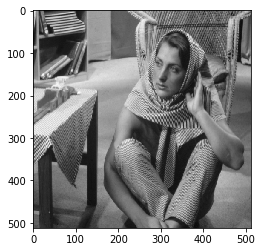

In [0]:
plt.imshow(img,cmap = 'gray')

In [0]:
height,width = img.shape
print("Height : ", height)
print("Width : ", width)

Height :  512
Width :  512


In [0]:
# Box filter
def box_filter(img):
  # get height, width
  height, width = img.shape

  # make kernel
  kernel = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype = np.float)

  # numpy.int -> 연산 결과가 소수점으로 나올 수 있기 때문에
  filter_img = np.zeros((height,width),np.int)
  
  kernel_size = 3
  margin = kernel_size//2;

  # Basic version
  for y in range(margin,height-margin):
    for x in range(margin,width-margin):
      pre_pixel = 0
      for f_y in range(0,kernel_size):
        for f_x in range(0,kernel_size):
          pre_pixel += img[y-f_y-1][x-f_x-1]*kernel[f_y][f_x]
      filter_img[y][x] = int(pre_pixel/9)

  return filter_img




# sharpening filter
def sharpening_filter(img):
  # get height, width
  height, width = img.shape

  # make kernel
  kernel = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype = np.float)

  # numpy.int -> 연산 결과가 소수점으로 나올 수 있기 때문에
  filter_img = np.zeros((height,width),np.int)
  
  kernel_size = 3
  margin = kernel_size//2;

  # Basic version
  for y in range(margin,height-margin):
    for x in range(margin,width-margin):
      pre_pixel = 0
      for f_y in range(0,kernel_size):
        for f_x in range(0,kernel_size):
          pre_pixel += img[y-f_y-1][x-f_x-1]*kernel[f_y][f_x]
      filter_img[y][x] = filter_img[y][x]*2 - int(pre_pixel/9)
      
  return filter_img


# Mosaic filter 7 x 7
def mosaic_filter(img):
  # get height, width
  height, width = img.shape

  # make kernel
  kernel = np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],], dtype = np.float)

  # numpy.int -> 연산 결과가 소수점으로 나올 수 있기 때문에
  filter_img = np.zeros((height,width),np.int)
  
  kernel_size = 7
  margin = kernel_size//2;

  # Basic version
  for y in range(margin,height-margin,kernel_size):
    for x in range(margin,width-margin,kernel_size):
      pre_pixel = 0
      for f_y in range(0,kernel_size):
        for f_x in range(0,kernel_size):
          pre_pixel += img[y-f_y-1][x-f_x-1]*kernel[f_y][f_x]
      mean = int(pre_pixel/9)
      for f_y in range(0,kernel_size):
        for f_x in range(0,kernel_size):
          filter_img[y-f_y-1][x-f_x-1] = mean
      
  return filter_img


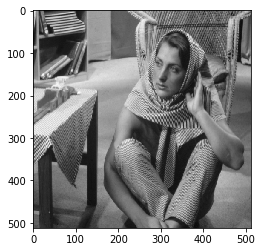

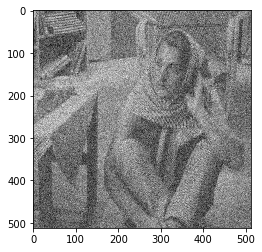

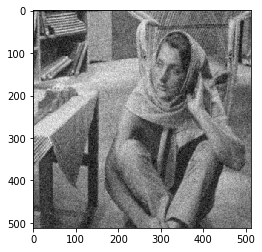

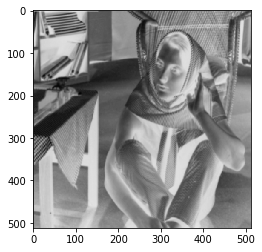

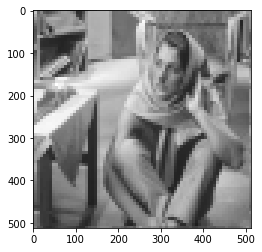

In [31]:
# noise_sigma : 표준 편차
noise_sigma = 35
noise = np.random.randn(height,width)*noise_sigma

# uint8 : 0 ~ 255
noise_img = np.zeros(img.shape,np.uint8)
noise_img = img + noise

# filter_img
filter_img = box_filter(noise_img)
sharpen_img = sharpening_filter(img)
mosaic_img = mosaic_filter(img)

plt.figure(1)
#plt.subplot(211)
plt.imshow(img,cmap='gray')

plt.figure(2)
#plt.subplot(212)
plt.imshow(noise_img,cmap='gray')

plt.figure(3)
plt.imshow(filter_img,cmap = 'gray')

plt.figure(4)
plt.imshow(sharpen_img,cmap = 'gray')

plt.figure(5)
plt.imshow(mosaic_img,cmap = 'gray')
plt.show()